In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data


In [2]:
mnist = input_data.read_data_sets("MNIST_data")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
def display_digit(digit):
    plt.imshow(digit.reshape(28,28), cmap="Greys", interpolation='nearest')

In [4]:
tr_digits, tr_labels = mnist.train.next_batch(10000)
tst_digits, tst_labels = mnist.test.next_batch(200)

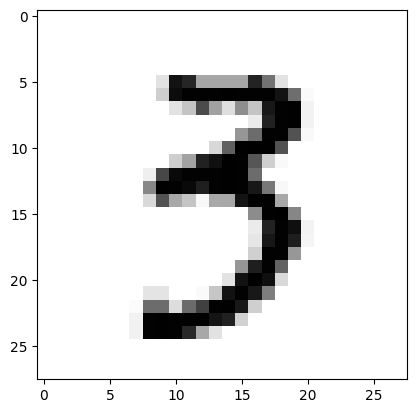

In [5]:
display_digit(tr_digits[42])

In [10]:
height = 28
width = 28
channels = 1
n_inputs = height * width
conv1_feature_maps = 32
conv1_kernel_size = 3
conv1_stride = 1
conv1_pad = 'SAME'
conv2_feature_maps = 64
conv2_kernel_size = 3
conv2_stride = 2
conv2_pad = 'SAME'
pool3_feature_maps = conv2_feature_maps
n_fullyconnl = 64
n_outputs = 10

In [11]:
tf.reset_default_graph()

In [13]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs], name = 'X') 
X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
y = tf.placeholder(tf.int32, shape=[None], name = 'y')

In [14]:
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_feature_maps, kernel_size=conv1_kernel_size,
                         strides=conv1_stride, padding=conv1_pad, activation=tf.nn.relu, name='conv1')
conv2 = tf.layers.conv2d(conv1, filters=conv2_feature_maps, kernel_size=conv2_kernel_size,
                         strides=conv2_stride, padding=conv2_pad, activation=tf.nn.relu, name='conv2')
                         

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
conv2.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(64)])

In [16]:
conv1.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(32)])

In [17]:
pool3 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
pool3.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

In [18]:
pool3_flat = tf.reshape(pool3, shape=[-1, pool3_feature_maps*7*7])
fullyconn1 = tf.layers.dense(pool3_flat, n_fullyconnl, activation=tf.nn.relu, name="fc1")
logits = tf.layers.dense(fullyconn1, n_outputs, name="output")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)

Instructions for updating:
Use keras.layers.dense instead.


Instructions for updating:
Use keras.layers.dense instead.


In [19]:
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [20]:
n_epochs = 5
batch_size = 100

In [21]:
with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for interation in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Tr accuracy:", acc_train, "Tst accuracy:", acc_test)
        save_path = saver.save(sess, "./my_mnist_model")

2024-04-05 04:56:08.089995: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


0 Tr accuracy: 0.97 Tst accuracy: 0.9776
1 Tr accuracy: 0.99 Tst accuracy: 0.9852
2 Tr accuracy: 0.99 Tst accuracy: 0.9894
3 Tr accuracy: 0.99 Tst accuracy: 0.9879
4 Tr accuracy: 1.0 Tst accuracy: 0.9904
